<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Python: Programação Funcional
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Função lambda;</li>
  <li>Função map;</li>
  <li>Função filter;</li>
  <li>Função reduce.</li>
</ol>

---

# **Aulas**

## 0\. Paradigmas de Programação

Estilos de programação.

1.   Imperativa;
2.   Funcional;
3.   Orientada a objetos.



O Python é uma linguagem [multi-paradigma](https://en.wikipedia.org/wiki/Python_(programming_language)).



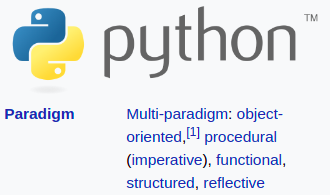

Este módulo é sobre **programação funcional**, que é o estilo que busca manipular dados com muitas e pequenas funções.

## 1\. Função lambda

### **1.1. Definição** 

Função anônima (sem nome) com bloco de código super enxuto e que pode ser salva em uma variável. Em geral é utilizada com outros métodos funcionais como `map`, `filter`, e `reduce`.

```python
variavel = lambda params: expressão
```

**Exemplo**: Função `lambda` para extrair provedor de e-mail.

In [ ]:
extrair_provedor_email = lambda email: email.split(sep='@')[-1]

In [ ]:
email = 'andre.perez@gmail.com'
print(email)

provedor_email = extrair_provedor_email(email)
print(provedor_email)

**Exemplo**: Função `lamba` com estruturas condicionais.

In [ ]:
numero_e_par = lambda numero: True if numero % 2 == 0 else False

In [ ]:
numeros = range(0, 10)

In [ ]:
for numero in numeros:
  if numero_e_par(numero) == True:
    print(f'O número {numero} é par!')

### **1.2. Função de alta ordem** 

São funções que recebem outras funções para parâmetro ou retornam outra função.

**Exemplo**: Juros compostos dinâmico.

 - Definição.

In [ ]:
def retorno(juros: float):
  return lambda investimento: investimento * (1 + juros)

 - Instanciação.

In [ ]:
retorno_5_porcento = retorno(juros=0.05)
retorno_10_porcento = retorno(juros=0.10)

In [ ]:
valor_final = retorno_5_porcento(investimento=1000)
print(valor_final)

valor_final = retorno_10_porcento(investimento=1000)
print(valor_final)

 - Uso.

In [ ]:
anos = 10
valor_inicial = 1000
valor_final = valor_inicial

for ano in range(1, anos+1):
  valor_final = retorno_5_porcento(investimento=valor_final)

valor_final = round(valor_final, 2)
print(valor_final)

In [ ]:
anos = 10
valor_inicial = 1000
valor_final = valor_inicial

for ano in range(1, anos+1):
  valor_final = retorno_10_porcento(investimento=valor_final)

valor_final = round(valor_final, 2)
print(valor_final)

## 2\. Função map

### **2.1. Definição** 

Aplica uma função em todos os elementos de uma coleção (`list`, `dict`, etc.) e retorna **todos** os elementos transformados.

```python
variavel = map(função, coleção)
```

In [ ]:
numeros = [1, 2, 3]

numeros_ao_cubo = map(lambda num: num ** 3, numeros)

print(list(numeros_ao_cubo))

### **2.2. Função de alta ordem** 

**Exemplo**: Função `lambda` para extrair provedor de e-mail (1 parâmetro).

In [ ]:
emails = ['andre.perez@gmail.com', 'andre.perez@live.com', 'andre.perez@yahoo.com']
extrair_provedor_email = lambda email: email.split(sep='@')[-1]

In [ ]:
provedores = []
for email in emails:
  provedor = extrair_provedor_email(email)
  provedores.append(provedor)

print(provedores)

In [ ]:
provedores = map(extrair_provedor_email, emails)
print(provedores)

In [ ]:
provedores = list(map(extrair_provedor_email, emails))
print(provedores)

In [ ]:
provedores = map(lambda email: email.split(sep='@')[-1], emails)
...
print(list(provedores))

- **Exemplo**: Investimento (Mais de 1 parâmetros).

In [ ]:
anos = [10, 10, 10]
taxas_juros = [0.05, 0.10, 0.15]
valores_iniciais = [1000, 1000, 1000]

def retorno(valor_inicial: float, taxa_juros: float, anos: int) -> float:
  valor_final = valor_inicial
  for ano in range(1,anos+1):
    valor_final = valor_final * (1+taxa_juros)
  return round(valor_final, 2)

cenarios = list(map(retorno, valores_iniciais, taxas_juros, anos))
print(cenarios)

## 3\. Função filter

### **3.1. Definição** 

Aplica uma função lógica (que retorna um booleano) em todos os elementos de uma coleção (`list`, `dict`, etc.) e retorna **apenas** aqueles que resultaram em verdadeiro (`True`).

```python
variavel = filter(função, coleção)
```

In [ ]:
numeros = [1, 2, 3]

numeros_par = filter(lambda num: num % 2 == 0, numeros)

print(list(numeros_par))

### **3.2. Função de alta ordem** 

**Exemplo**: Função `lambda` para extrair provedor de e-mail.

In [ ]:
emails = ['andre.perez@gmail.com', 'andre.perez@live.com', 'andre.perez@yahoo.com']
provedor_da_google = lambda email: 'gmail' in email

In [ ]:
emails_google = []
for email in emails:
  if provedor_da_google(email) == True:
    emails_google.append(email)

print(emails_google)

In [ ]:
emails_google = filter(provedor_da_google, emails)
print(emails_google)

In [ ]:
emails_google = list(filter(provedor_da_google, emails))
print(emails_google)

In [ ]:
emails_google = filter(lambda email: 'gmail' in email, emails)
...
print(list(emails_google))

## 4\. Função reduce

### **4.1. Definição** 

Aplica uma função a todos os elemento de uma coleção, dois a dois, e retorna **apenas** um elemento.

```python
variavel = reduce(função, coleção)
```

In [ ]:
numeros = [1, 2, 3]

In [ ]:
from functools import reduce

soma = reduce(lambda x, y: x + y, numeros)
print(soma)

### **4.2. Função de alta ordem** 

**Exemplo**: Encontrar maior número em uma lista.

In [ ]:
def maior_entre(primeiro: int, segundo: int) -> int:
  return primeiro if primeiro >= segundo else segundo

primeiro = 11
segundo = 11

print(maior_entre(primeiro=primeiro, segundo=segundo))

In [ ]:
from random import random

print(random())

In [ ]:
from random import random

numeros = [round(100 * random()) for _ in range(0, 100)]
print(numeros)

In [ ]:
maior_numero = reduce(maior_entre, numeros)
print(maior_numero)

In [ ]:
maior_numero = reduce(lambda primeiro, segundo: primeiro if primeiro >= segundo else segundo, numeros)
print(maior_numero)

### **4.3. Compossibilidade** 

**Exemplo**: Combinação de métodos funcionais.

In [ ]:
from random import random

numeros = [round(100 * random()) for _ in range(0, 100)]
print(numeros)

 - Eleve os números ao quadrado.

In [ ]:
numeros_ao_quadrado = map(lambda numero: numero ** 2, numeros)

 - Filtra os números ímpares.

In [ ]:
numeros_impares = filter(lambda numero: numero % 2 != 0, numeros_ao_quadrado)

 - Soma todos os números.

In [ ]:
soma_numeros = reduce(lambda x, y: x + y, numeros_impares)
print(soma_numeros)

 - Todos os métodos de uma vez.

In [ ]:
soma_numeros = reduce(lambda x, y: x + y, filter(lambda numero: numero % 2 != 0, map(lambda numero: numero ** 2, numeros)))
print(soma_numeros)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7bc88e6b-e21c-42d6-a070-b420cc720827' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>